# Regression 101

This is our first basic regression example.

In this example, we won't be doing anything complicated or using complex databases yet.

In [1]:
import numpy as np
from sklearn import linear_model
lr = linear_model.LinearRegression() #In sklearn we define an object as our ML operator
import pylab as plt
%matplotlib inline 
#again, this is only in jupyter notebooks

In [2]:
#Let's create some data
x = np.arange(0,10,1) #Data from 0 to 10 in steps of 1
y = np.power(x,2)
print y

[ 0  1  4  9 16 25 36 49 64 81]


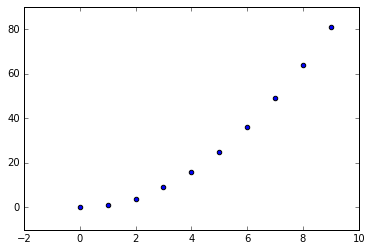

In [3]:
plt.scatter(x,y)

In [4]:
#lr.fit(x,y)#<-- This doesn't work!!
#We need to reshape from 1D to 2D vectors

x = x[:,None]
y = y[:,None]
lr.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [5]:
print lr.coef_
print lr.intercept_

[[ 9.]]
[-12.]


The resulting weight is:

$y = 9x - 12$

In [6]:
predict_y = lr.predict(x)

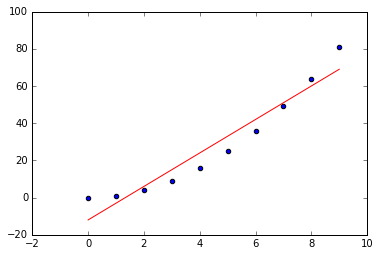

In [7]:
plt.plot(x, predict_y, c ='red')
plt.scatter(x, y, c ='blue')

In [8]:
lr.fit_intercept = False

In [9]:
lr.fit(x,y)
print lr.coef_
print lr.intercept_

[[ 7.10526316]]
0.0


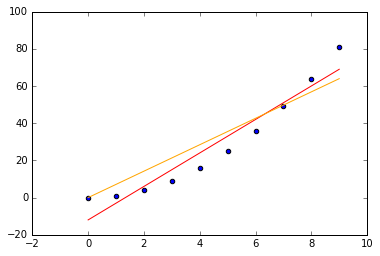

In [10]:
predict_y_2 = lr.predict(x)
plt.plot(x, predict_y, c ='red')
plt.scatter(x, y, c ='blue')
plt.plot(x, predict_y_2, c ='orange')

In [11]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(2, include_bias = False)
x_2 = poly.fit_transform(x)
print x_2

[[  0.   0.]
 [  1.   1.]
 [  2.   4.]
 [  3.   9.]
 [  4.  16.]
 [  5.  25.]
 [  6.  36.]
 [  7.  49.]
 [  8.  64.]
 [  9.  81.]]


In [12]:
lr.intercept_ = True
lr.fit(x_2,y)
print lr.coef_
print lr.intercept_

[[  1.06625262e-15   1.00000000e+00]]
0.0


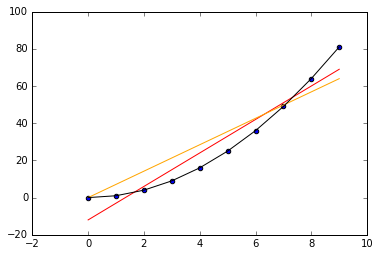

In [13]:
predict_y_3 = lr.predict(x_2)
plt.plot(x, predict_y, c ='red',label = 'First Attempt')
plt.scatter(x, y, c ='blue')
plt.plot(x, predict_y_2, c ='orange', label = 'Second Attempt (no intercept)')
plt.plot(x, predict_y_3, c ='black', label = 'Different features')


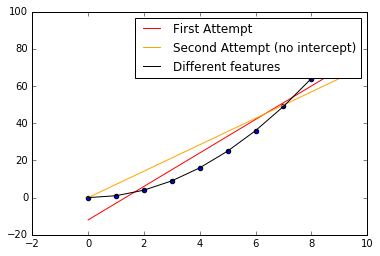

In [14]:
predict_y_3 = lr.predict(x_2)
plt.plot(x, predict_y, c ='red',label = 'First Attempt')
plt.scatter(x, y, c ='blue')
plt.plot(x, predict_y_2, c ='orange', label = 'Second Attempt (no intercept)')
plt.plot(x, predict_y_3, c ='black', label = 'Different features')

plt.legend()

In [15]:
poly = PolynomialFeatures(3, include_bias = False)
x_3 = poly.fit_transform(x)
print x_3
lr.intercept_ = True
lr.fit(x_3,y)
print lr.coef_
print lr.intercept_

[[   0.    0.    0.]
 [   1.    1.    1.]
 [   2.    4.    8.]
 [   3.    9.   27.]
 [   4.   16.   64.]
 [   5.   25.  125.]
 [   6.   36.  216.]
 [   7.   49.  343.]
 [   8.   64.  512.]
 [   9.   81.  729.]]
[[  1.10220646e-14   1.00000000e+00  -8.18288691e-17]]
0.0


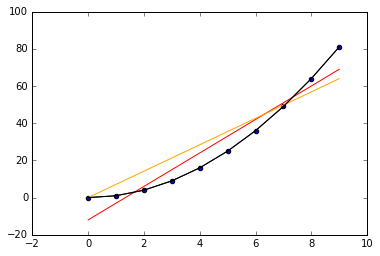

In [16]:
predict_y_4 = lr.predict(x_3)
plt.plot(x, predict_y, c ='red',label = 'First Attempt')
plt.scatter(x, y, c ='blue')
plt.plot(x, predict_y_2, c ='orange', label = 'Second Attempt (no intercept)')
plt.plot(x, predict_y_3, c ='black', label = 'Different features')
plt.plot(x, predict_y_4, c ='black', label = '3rd Degree')

In [17]:
y_noise = np.random.rand(10,1)
y_n = y + 100*y_noise
lr.fit(x_3,y_n)
print lr.coef_
print lr.intercept_

[[  2.24780234e+01  -9.92113537e-01  -1.35619565e-02]]
0.0


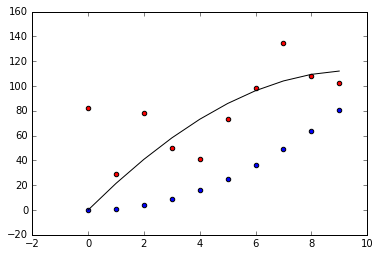

In [18]:
predict_y_n = lr.predict(x_3)
plt.scatter(x, y, c ='blue')
plt.scatter(x, y_n, c ='red')
plt.plot(x, predict_y_n, c ='black', label = '3rd Degree')


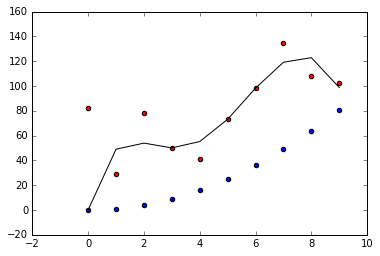

In [19]:
poly = PolynomialFeatures(5, include_bias = False)
x_5 = poly.fit_transform(x)
lr.fit(x_5,y_n)
predict_y_n = lr.predict(x_5)
plt.scatter(x, y, c ='blue')
plt.scatter(x, y_n, c ='red')
plt.plot(x, predict_y_n, c ='black', label = '3rd Degree')

In [20]:
lr.coef_

array([[  8.81265360e+01,  -4.95593700e+01,   1.15051496e+01,
         -1.07447535e+00,   3.35709123e-02]])